# Required Packages

In [3]:
import pandas as pd
import numpy
import string
from sklearn.model_selection import train_test_split
import sklearn.decomposition
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%pylab inline
import math
import statistics
import sklearn
from sklearn import neighbors
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, completeness_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import graphviz
import pydot
import pydotplus
from sklearn import svm
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin\\"
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Data

In [13]:
#Original Data
fraud = pd.read_csv('/content/drive/My Drive/fraudData.csv')
#Upsampled Data - Training

In [29]:
df2=pd.read_csv('/content/drive/My Drive/creditcard_new.csv')
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
#checking correlation
corr=df2.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.002686,0.020600,0.017778,-0.097879,-0.051879,-0.080764,-0.052962,-0.022570,0.022444,...,-0.004075,-0.071409,-0.010548,-0.011013,-0.032533,0.037866,-0.033742,0.001207,-0.038772,0.013544
V1,0.002686,1.000000,-0.134096,-0.268406,0.149927,-0.164363,-0.040089,-0.211925,0.089501,-0.149517,...,-0.149236,-0.034600,-0.109567,0.005128,0.327176,-0.009098,-0.053667,0.167620,-0.220962,-0.084582
V2,0.020600,-0.134096,1.000000,0.000470,0.053434,0.105429,-0.091247,0.198326,-0.110033,0.017140,...,0.022960,-0.106816,0.015567,-0.004639,-0.154883,-0.049483,0.129283,-0.025331,-0.575517,-0.032097
V3,0.017778,-0.268406,0.000470,1.000000,0.053497,-0.101983,-0.140684,0.037215,-0.102014,0.075886,...,0.043461,0.316771,0.050877,0.068206,-0.312734,0.090067,-0.128422,-0.165491,-0.220147,-0.049515
V4,-0.097879,0.149927,0.053434,0.053497,1.000000,-0.072012,0.050155,-0.000845,0.093773,-0.095999,...,-0.004025,0.063971,0.032647,0.034612,0.052640,-0.040390,0.091431,0.129510,0.083684,0.103333
V5,-0.051879,-0.164363,0.105429,-0.101983,-0.072012,1.000000,0.260821,0.065586,-0.016117,0.038647,...,-0.045130,-0.095719,0.003276,0.009953,-0.048119,-0.175873,-0.082139,-0.108685,-0.319484,0.018661
V6,-0.080764,-0.040089,-0.091247,-0.140684,0.050155,0.260821,1.000000,-0.091981,0.098941,0.020683,...,0.090694,0.011695,-0.112296,-0.009361,0.051224,0.015488,0.017721,-0.028725,0.230463,-0.050714
V7,-0.052962,-0.211925,0.198326,0.037215,-0.000845,0.065586,-0.091981,1.000000,-0.100522,0.027307,...,-0.141174,-0.005272,-0.049593,-0.023580,-0.248014,-0.070794,-0.167835,-0.330016,0.316488,-0.064072
V8,-0.022570,0.089501,-0.110033,-0.102014,0.093773,-0.016117,0.098941,-0.100522,1.000000,-0.143726,...,-0.398271,0.174784,0.001898,-0.016076,0.028493,0.033638,0.202117,0.276301,-0.017309,0.036669
V9,0.022444,-0.149517,0.017140,0.075886,-0.095999,0.038647,0.020683,0.027307,-0.143726,1.000000,...,0.010299,0.038933,-0.087201,-0.035321,0.097783,0.068375,-0.022085,-0.273374,-0.025333,-0.076318


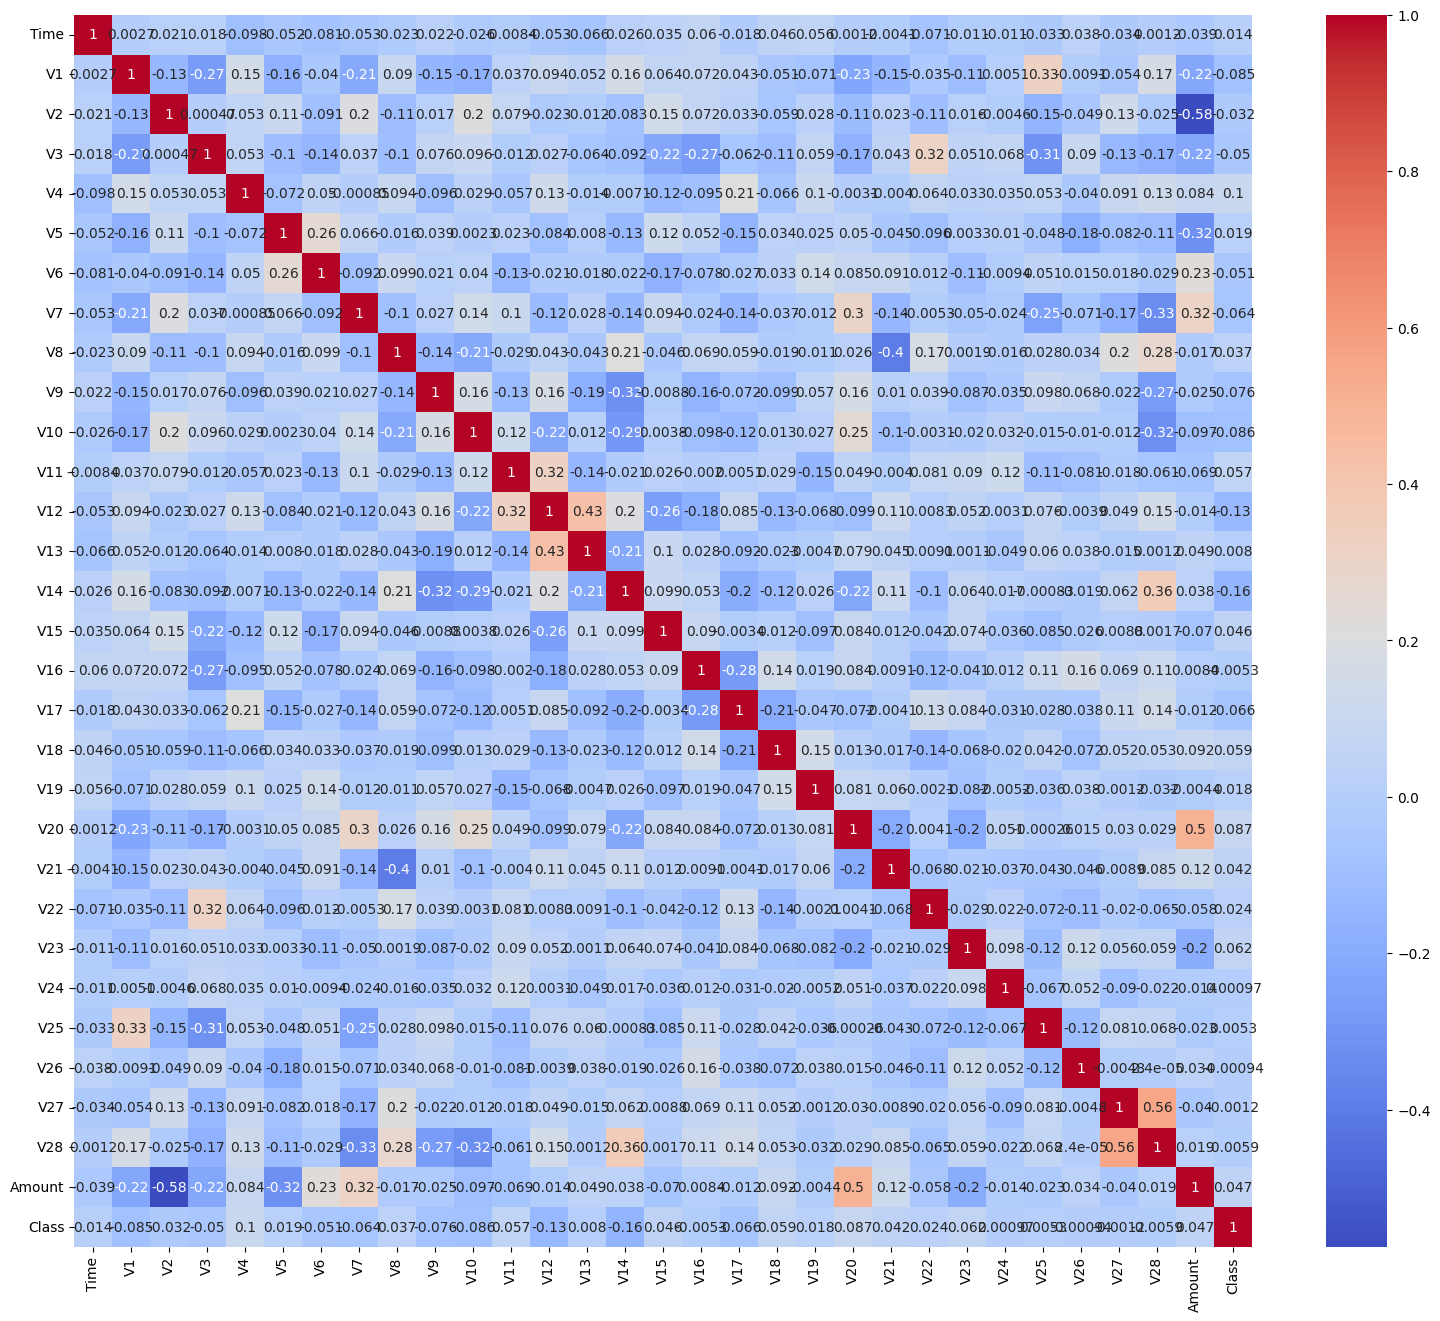

In [36]:
#checking the correlation in hetmap
plt.figure(figsize=(19,16))
sns.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

In [15]:
df=pd.DataFrame(fraud)
df.head(100)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
95,0,'C1697851479','3','M','28007','M348934600','28007','es_transportation',20.73,0
96,0,'C1255236689','1','F','28007','M348934600','28007','es_transportation',68.17,0
97,0,'C603081336','3','F','28007','M348934600','28007','es_transportation',34.75,0
98,0,'C274486575','2','F','28007','M692898500','28007','es_health',171.07,0


from matplotlib import pyplot as plt
_df_20['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['fraud'].plot(kind='hist', bins=20, title='fraud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('merchant').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='amount', y='fraud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('age')):
  _plot_series(series, series_name, i)
  fig.legend(title='age', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('merchant')):
  _plot_series(series, series_name, i)
  fig.legend(title='merchant', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
_df_31['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['fraud'].plot(kind='line', figsize=(8, 4), title='fraud')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gender'].value_counts()
    for x_label, grp in _df_33.groupby('age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('age')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['merchant'].value_counts()
    for x_label, grp in _df_34.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('merchant')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_35.groupby('merchant')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('merchant')
_ = plt.ylabel('category')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='amount', y='age', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='amount', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['merchant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='amount', y='merchant', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='amount', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Pre-process the Original Data

## Remove Apostrophes from Columns for Data Type Adjustment

In [17]:
fraud["customer"] = fraud["customer"].str.replace('[^\w\s]','')
fraud["age"] = fraud["age"].str.replace('[^\w\s]','')
fraud["gender"] = fraud["gender"].str.replace('[^\w\s]','')
fraud["zipcodeOri"] = fraud["zipcodeOri"].str.replace('[^\w\s]','')
fraud["merchant"] = fraud["merchant"].str.replace('[^\w\s]','')
fraud["zipMerchant"] = fraud["zipMerchant"].str.replace('[^\w\s]','')
fraud["category"] = fraud["category"].str.replace('[^\w\s]','')

## Fix Column Data Types

In [18]:
fraud["step"] = fraud["step"].astype("category")
fraud["customer"] = fraud["customer"].astype("category")
fraud["age"] = fraud["age"].astype("category")
fraud["gender"] = fraud["gender"].astype("category")
fraud["zipcodeOri"] = fraud["zipcodeOri"].astype("category")
fraud["merchant"] = fraud["merchant"].astype("category")
fraud["zipMerchant"] = fraud["zipMerchant"].astype("category")
fraud["category"] = fraud["category"].astype("category")
fraud["amount"] = fraud["amount"].astype(float)
fraud["fraud"] = fraud["fraud"].astype("category")

## Zip Columns not Necessary in Clustering Analysis - Eliminate

In [19]:
fraud = fraud.drop(["zipcodeOri"], axis = 1)
fraud = fraud.drop(["zipMerchant"], axis = 1)

## Change Categorical Columns to Binary Columns

In [20]:
fraudBinaryCols = pandas.get_dummies(fraud,columns = ["age","gender","merchant","category"])
fraudBinaryCols = fraudBinaryCols.drop(["customer"], axis = 1)

## Plot Distribution of Amount

<ipython-input-21-a3a2bc284744>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud["amount"], kde=False, rug=True)


Text(0.5, 1.0, 'Amount Rug Distribution')

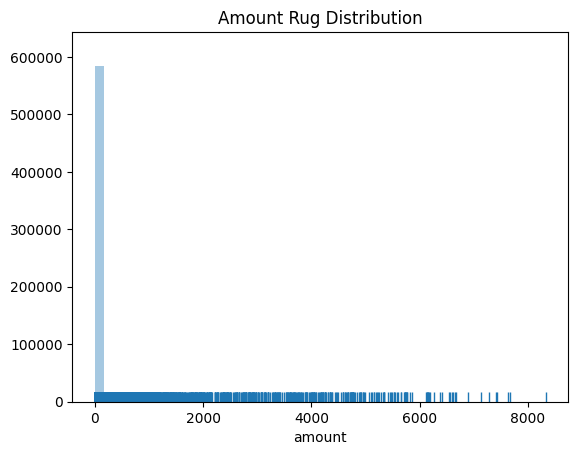

In [21]:
sns.distplot(fraud["amount"], kde=False, rug=True)
title("Amount Rug Distribution")

# Standardize the Data for Customer Clustering

## Original Data

In [22]:
scaler = StandardScaler()
fraudElim = fraudBinaryCols
fraudElim = fraudElim.drop(["step", "fraud"], axis = 1)
fraudStandScaler = scaler.fit_transform(fraudBinaryCols)
fraudStand = pandas.DataFrame(fraudStandScaler)
fraudStand.columns = list(fraudBinaryCols)
dataStandardized = fraudStand
dataStandardized["fraud"] = fraudBinaryCols["fraud"]

## Upsampled Data

In [ ]:
scaler = StandardScaler()
fraudStandScaler = scaler.fit_transform(fraudUp)
fraudStand = pandas.DataFrame(fraudStandScaler)
fraudStand.columns = list(fraudBinaryCols)
dataStandardizedUP = fraudStand

## Test Data (from Upsampled)

In [ ]:
fraudTestTest = fraudTest
fraudTestTest = fraudTestTest.drop("fraud", axis = 1)
scaler = StandardScaler()
fraudStandScaler = scaler.fit_transform(fraudTestTest)
fraudStand = pandas.DataFrame(fraudStandScaler)
fraudStand.columns = list(fraudTestTest)
dataStandardizedTest = fraudStand

# Attempt to Cluster Customers by Purchase Behavior

## Original Data - Standardized

### K-Means Clustering

k: 2  cost: 45582627.414760284
k: 3  cost: 44082528.24596801
k: 4  cost: 43113145.498852685
k: 5  cost: 41905419.66589378
k: 6  cost: 40600675.23316435
k: 7  cost: 39879098.315167114
k: 8  cost: 39451977.14252325
k: 9  cost: 38151369.41422901
k: 10  cost: 37548416.16936904


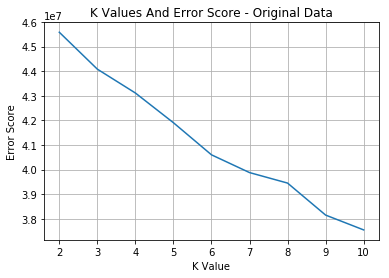

In [ ]:
error = list()
kList = list()
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 891).fit(dataStandardized)
    labels = kmeans_model.labels_
    labels = labels.tolist()
    cost = kmeans_model.inertia_
    error.append(cost)
    kList.append(k)
    print("k:", k, " cost:", cost)
plt.plot(kList, error)
plt.title("K Values And Error Score - Original Data")
plt.xlabel("K Value")
plt.ylabel("Error Score")
plt.grid()
plt.show()

### Using the Best Value of k

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 891).fit(dataStandardized)
labs = kmeans.labels_
labsList = labs.tolist()
dataStandardized["customerGroup"] = labsList
dataStandardized["fraud"] = fraud["fraud"]

### Examine Customer Group Distribution

Text(0.5,1,'Customer Group Breakdown - Original Data')

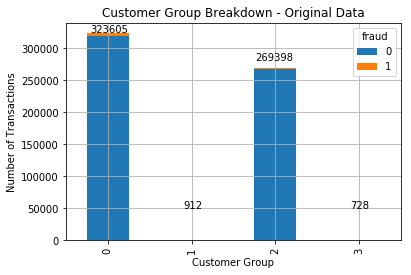

In [ ]:
counts = dataStandardized.groupby("customerGroup").count()
counts = counts["step"].values.tolist()

dataStandardized.groupby(['customerGroup', 'fraud']).size().unstack().plot(kind='bar', stacked=True)
annotate(counts[0], [-0.21, 325000])
annotate(counts[1], [0.9, 50000])
annotate(counts[2], [1.76, 280000])
annotate(counts[3], [2.9, 50000])

ylabel("Number of Transactions")
xlabel("Customer Group")
grid()
title("Customer Group Breakdown - Original Data")

In [ ]:
cust0 = dataStandardized.loc[dataStandardized['customerGroup'] == 0]
cust0 = cust0.reset_index(drop = True)
cust1 = dataStandardized.loc[dataStandardized['customerGroup'] == 1]
cust1 = cust1.reset_index(drop = True)
cust2 = dataStandardized.loc[dataStandardized['customerGroup'] == 2]
cust2 = cust2.reset_index(drop = True)
cust3 = dataStandardized.loc[dataStandardized['customerGroup'] == 3]
cust3 = cust3.reset_index(drop = True)

counts0 = cust0.groupby("fraud").count()
counts0 = counts0["step"].values.tolist()
nofraud0 = counts0[0]/sum(counts0)
fraud0 = counts0[1]/sum(counts0)
print("Customer Group 0:", "%s not fraud" % nofraud0, "| %s fraud" % fraud0)

counts1 = cust1.groupby("fraud").count()
counts1 = counts1["step"].values.tolist()
nofraud1 = counts1[0]/sum(counts1)
fraud1 = counts1[1]/sum(counts1)
print("Customer Group 1:", "%s not fraud" % nofraud1, "| %s fraud" % fraud1)

counts2 = cust2.groupby("fraud").count()
counts2 = counts2["step"].values.tolist()
nofraud2 = counts2[0]/sum(counts2)
fraud2 = counts2[1]/sum(counts2)
print("Customer Group 2:", "%s not fraud" % nofraud2, "| %s fraud" % fraud2)

counts3 = cust3.groupby("fraud").count()
counts3 = counts3["step"].values.tolist()
nofraud3 = counts3[0]/sum(counts3)
fraud3 = counts3[1]/sum(counts3)
print("Customer Group 3:", "%s not fraud" % nofraud3, "| %s fraud" % fraud3)

Customer Group 0: 0.9869006968371935 not fraud | 0.013099303162806508 fraud
Customer Group 1: 0.75 not fraud | 0.25 fraud
Customer Group 2: 0.9920006830043282 not fraud | 0.00799931699567183 fraud
Customer Group 3: 0.20604395604395603 not fraud | 0.7939560439560439 fraud


## Upsampled Data - Standardized

### K-Means Clustering

k: 2  cost: 70679353.74244852
k: 3  cost: 68894406.45436603
k: 4  cost: 66690476.96307046
k: 5  cost: 64420003.92912575
k: 6  cost: 62993960.50975509
k: 7  cost: 60770439.98079894
k: 8  cost: 59677998.21574084
k: 9  cost: 58416067.61473298
k: 10  cost: 55712832.18699259


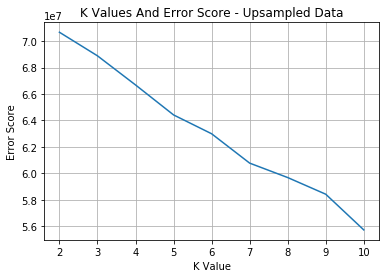

In [ ]:
error = list()
kList = list()
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 891).fit(dataStandardizedUP)
    labels = kmeans_model.labels_
    labels = labels.tolist()
    cost = kmeans_model.inertia_
    error.append(cost)
    kList.append(k)
    print("k:", k, " cost:", cost)
plot(kList, error)
title("K Values And Error Score - Upsampled Data")
xlabel("K Value")
ylabel("Error Score")
grid()
show()

### Using the Best Value of k

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 891).fit(dataStandardizedUP)
labs = kmeans.labels_
labsList = labs.tolist()
dataStandardizedUP["customerGroup"] = labsList
dataStandardizedUP["fraud"] = fraudUp["fraud"]

### Examine Customer Group Distribution

Text(0.5,1,'Customer Group Breakdown - Upsampled Data')

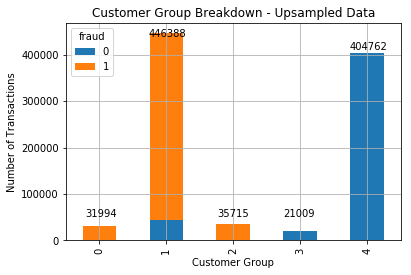

In [ ]:
counts = dataStandardizedUP.groupby("customerGroup").count()
counts = counts["amount"].values.tolist()

dataStandardizedUP.groupby(['customerGroup', 'fraud']).size().unstack().plot(kind='bar', stacked=True)
annotate(counts[0], [-0.21, 50000])
annotate(counts[1], [0.73, 439000])
annotate(counts[2], [1.76, 50000])
annotate(counts[3], [2.74, 50000])
annotate(counts[4], [3.73, 410000])

ylabel("Number of Transactions")
xlabel("Customer Group")
grid()
title("Customer Group Breakdown - Upsampled Data")

In [ ]:
cust0 = dataStandardizedUP.loc[dataStandardizedUP['customerGroup'] == 0]
cust0 = cust0.reset_index(drop = True)
cust1 = dataStandardizedUP.loc[dataStandardizedUP['customerGroup'] == 1]
cust1 = cust1.reset_index(drop = True)
cust2 = dataStandardizedUP.loc[dataStandardizedUP['customerGroup'] == 2]
cust2 = cust2.reset_index(drop = True)
cust3 = dataStandardizedUP.loc[dataStandardizedUP['customerGroup'] == 3]
cust3 = cust3.reset_index(drop = True)
cust4 = dataStandardizedUP.loc[dataStandardizedUP['customerGroup'] == 4]
cust4 = cust4.reset_index(drop = True)

counts0 = cust0.groupby("fraud").count()
counts0 = counts0["amount"].values.tolist()
nofraud0 = counts0[0]/sum(counts0)
fraud0 = counts0[1]/sum(counts0)
print("Customer Group 0:", "%s not fraud" % nofraud0, "| %s fraud" % fraud0)

counts1 = cust1.groupby("fraud").count()
counts1 = counts1["amount"].values.tolist()
nofraud1 = counts1[0]/sum(counts1)
fraud1 = counts1[1]/sum(counts1)
print("Customer Group 1:", "%s not fraud" % nofraud1, "| %s fraud" % fraud1)

counts2 = cust2.groupby("fraud").count()
counts2 = counts2["amount"].values.tolist()
nofraud2 = counts2[0]/sum(counts2)
fraud2 = counts2[1]/sum(counts2)
print("Customer Group 2:", "%s not fraud" % nofraud2, "| %s fraud" % fraud2)

counts3 = cust3.groupby("fraud").count()
counts3 = counts3["amount"].values.tolist()
nofraud3 = counts3[0]/sum(counts3)
print("Customer Group 3:", "%s not fraud" % nofraud3, "| %s fraud" % 0)

counts4 = cust4.groupby("fraud").count()
counts4 = counts4["amount"].values.tolist()
nofraud4 = counts4[0]/sum(counts4)
print("Customer Group 4:", "%s not fraud" % nofraud4, "| %s fraud" % 0)

Customer Group 0: 0.0006251172094767769 not fraud | 0.9993748827905232 fraud
Customer Group 1: 0.09862720324023047 not fraud | 0.9013727967597696 fraud
Customer Group 2: 0.003275934481310374 not fraud | 0.9967240655186896 fraud
Customer Group 3: 1.0 not fraud | 0 fraud
Customer Group 4: 1.0 not fraud | 0 fraud


## Test Data - Standardized

### K-Means Clustering

k: 2  cost: 8983754.79033209
k: 3  cost: 8759730.472061029
k: 4  cost: 8560138.352494117
k: 5  cost: 8313444.254985454
k: 6  cost: 8180582.2624179255
k: 7  cost: 8026945.636027608
k: 8  cost: 7644403.490412499
k: 9  cost: 7617370.704876197
k: 10  cost: 7444527.622420674


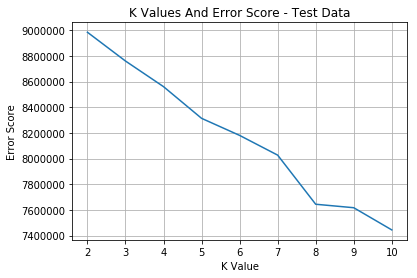

In [ ]:
error = list()
kList = list()
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 891).fit(dataStandardizedTest)
    labels = kmeans_model.labels_
    labels = labels.tolist()
    cost = kmeans_model.inertia_
    error.append(cost)
    kList.append(k)
    print("k:", k, " cost:", cost)
plot(kList, error)
title("K Values And Error Score - Test Data")
xlabel("K Value")
ylabel("Error Score")
grid()
show()

### Using the Best Value of k

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 891).fit(dataStandardizedTest)
labs = kmeans.labels_
labsList = labs.tolist()
dataStandardizedTest["customerGroup"] = labsList
dataStandardizedTest["fraud"] = fraudTest["fraud"]

### Examine Customer Group Distribution

Text(0.5,1,'Customer Group Breakdown - Test Data')

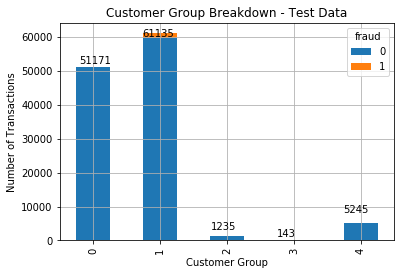

In [ ]:
counts = dataStandardizedTest.groupby("customerGroup").count()
counts = counts["amount"].values.tolist()

dataStandardizedTest.groupby(['customerGroup', 'fraud']).size().unstack().plot(kind='bar', stacked=True)
annotate(counts[0], [-0.21, 52000])
annotate(counts[1], [0.73, 60000])
annotate(counts[2], [1.76, 3000])
annotate(counts[3], [2.74, 1000])
annotate(counts[4], [3.73, 8200])

ylabel("Number of Transactions")
xlabel("Customer Group")
grid()
title("Customer Group Breakdown - Test Data")

In [ ]:
cust0 = dataStandardizedTest.loc[dataStandardizedTest['customerGroup'] == 0]
cust0 = cust0.reset_index(drop = True)
cust1 = dataStandardizedTest.loc[dataStandardizedTest['customerGroup'] == 1]
cust1 = cust1.reset_index(drop = True)
cust2 = dataStandardizedTest.loc[dataStandardizedTest['customerGroup'] == 2]
cust2 = cust2.reset_index(drop = True)
cust3 = dataStandardizedTest.loc[dataStandardizedTest['customerGroup'] == 3]
cust3 = cust3.reset_index(drop = True)
cust4 = dataStandardizedTest.loc[dataStandardizedTest['customerGroup'] == 4]
cust4 = cust4.reset_index(drop = True)

counts0 = cust0.groupby("fraud").count()
counts0 = counts0["amount"].values.tolist()
nofraud0 = counts0[0]/sum(counts0)
print("Customer Group 0:", "%s not fraud" % nofraud0)#, "%s fraud" % fraud0)

counts1 = cust1.groupby("fraud").count()
counts1 = counts1["amount"].values.tolist()
nofraud1 = counts1[0]/sum(counts1)
fraud1 = counts1[1]/sum(counts1)
print("Customer Group 1:", "%s not fraud" % nofraud1, "| %s fraud" % fraud1)

counts2 = cust2.groupby("fraud").count()
counts2 = counts2["amount"].values.tolist()
nofraud2 = counts2[0]/sum(counts2)
fraud2 = counts2[1]/sum(counts2)
print("Customer Group 2:", "%s not fraud" % nofraud2, "| %s fraud" % fraud2)

counts3 = cust3.groupby("fraud").count()
counts3 = counts3["amount"].values.tolist()
nofraud3 = counts3[0]/sum(counts3)
fraud3 = counts3[1]/sum(counts3)
print("Customer Group 3:", "%s not fraud" % nofraud3, "| %s fraud" % fraud3)

counts4 = cust4.groupby("fraud").count()
counts4 = counts4["amount"].values.tolist()
nofraud4 = counts4[0]/sum(counts4)
print("Customer Group 4:", "%s not fraud" % nofraud4)#, "%s fraud" % fraud4)

Customer Group 0: 1.0 not fraud
Customer Group 1: 0.9791281589923939 not fraud | 0.02087184100760612 fraud
Customer Group 2: 0.9748987854251012 not fraud | 0.025101214574898785 fraud
Customer Group 3: 0.2097902097902098 not fraud | 0.7902097902097902 fraud
Customer Group 4: 1.0 not fraud


# Split Data into Train Test

In [ ]:
dataStandardized1 = dataStandardized
dataStandardized1 = dataStandardized1.drop("fraud", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(dataStandardized1, dataStandardized['fraud'], test_size = 0.40, random_state = 10, stratify = dataStandardized['fraud'])

# Naive Bayes

In [ ]:
gnb = GaussianNB()
nb = cross_val_score(gnb, X_train, y_train, cv = 10)
print("Train Data:", numpy.mean(nb))

gnb = GaussianNB()
nb = cross_val_score(gnb, X_test, y_test, cv = 10)
print("Test Data:", numpy.mean(nb))

Train Data: 0.9507042088251954
Test Data: 0.9501341129450445


# Logistic Regression

In [ ]:
reg = sklearn.linear_model.LogisticRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
y_pred = reg.predict(X_test)
confMat = sklearn.metrics.confusion_matrix(y_test, y_pred)
confMatList = confMat.tolist()
TN = confMatList[0][0]
TP = confMatList[1][1]
FN = confMatList[1][0]
FP = confMatList[0][1]

precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)
print("Precision:", precision)
print("Recall:", recall)
confMat

[[ 0.34564236  1.45480284 -0.06327624  0.01653141  0.00553531 -0.02211753
   0.01278538  0.01781141 -0.0161141  -0.0214958  -0.0214958   0.09324961
  -0.08612507 -0.08888809 -0.28946347 -0.01800635  0.294898    0.098587
  -0.02336559 -0.08820967  0.08558719 -0.11031536 -0.06295951  0.26915115
   0.26849323 -0.09250767  0.07869496 -0.03713408  0.09439651  0.10722117
   0.10784619 -0.09594644 -0.16007575 -0.12007918 -0.09326862  0.16978337
   0.13507215 -0.22846964 -0.27896592  0.13845099  0.01721911  0.29293434
   0.17480885  0.0596751  -0.06294638 -0.1013012   0.1081484  -0.11461935
   0.54606914 -0.13131509  0.15851804  0.26758384 -0.01483232  0.12059642
   0.06384526  0.18116047  0.20074922  0.30185636  0.10018849 -0.13240982
   0.15088436  0.02576749 -0.09346524  0.31070779  0.26915115 -0.02747386
  -0.02397785 -0.13240982  0.02001663  0.01457554  0.06923648  0.30185636
   0.14598932  0.13507215  0.29679227  0.06745923 -0.30750631  0.01994153
   0.22909168]]
Precision: 0.88869936034

array([[234717,    261],
       [   796,   2084]], dtype=int64)

# Neural Network

In [ ]:
reg = MLPRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = numpy.rint(y_pred)

confMat = sklearn.metrics.confusion_matrix(y_test, y_pred)
confMatList = confMat.tolist()
TN = confMatList[0][0]
TP = confMatList[1][1]
FN = confMatList[1][0]
FP = confMatList[0][1]

precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)
print("Precision:", precision)
print("Recall:", recall)
confMat

Precision: 0.8720699245133094
Recall: 0.7624175060784995


array([[234656,    322,      0],
       [   684,   2195,      1],
       [     0,      0,      0]], dtype=int64)

# Decision Tree - Different Max_Depth Values

## Determine Best Max_Depth Value

In [ ]:
accuracy = []
for x in range(2, 101):
    print(x)
    clf = tree.DecisionTreeClassifier(max_depth = x)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confMat = sklearn.metrics.confusion_matrix(y_test, y_pred)
    confMatList = confMat.tolist()
    TN = confMatList[0][0]
    TP = confMatList[1][1]
    FN = confMatList[1][0]
    FP = confMatList[0][1]

    precision = (TP) / (TP + FP)
    recall = (TP) / (TP + FN)
    f1 = 2*((precision * recall) / (precision + recall))
    accuracy.append([x, precision, recall, f1])

accuracyDF = pandas.DataFrame(data = accuracy, columns = ["k", "precision", "recall", "f-measure"])
accuracyDF = accuracyDF.sort_values(by = ["precision", "recall"], ascending = False)
accuracyDF

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


,k,precision,recall,f-measure
6,8,0.903128,0.721875,0.802393
3,5,0.900415,0.678125,0.773619
4,6,0.900312,0.702431,0.789155
2,4,0.893855,0.666667,0.763723
5,7,0.888984,0.720139,0.795703
8,10,0.884826,0.730903,0.800532
7,9,0.879768,0.736806,0.801965
9,11,0.879079,0.729514,0.797343
10,12,0.875517,0.735069,0.799169
1,3,0.875224,0.679514,0.765051


## Apply Best Value

In [ ]:
maxVals = list(accuracyDF["k"])
best = maxVals[0]
clf = tree.DecisionTreeClassifier(max_depth = best)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy.append([x, sklearn.metrics.accuracy_score(y_test, y_pred)])
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("fraudDT")

#print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
confMat = sklearn.metrics.confusion_matrix(y_test, y_pred)
confMatList = confMat.tolist()
TN = confMatList[0][0]
TP = confMatList[1][1]
FN = confMatList[1][0]
FP = confMatList[0][1]

precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)
print("Precision:", precision)
print("Recall:", recall)
confMat